In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [415]:
df=pd.read_csv("secom_lr.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [416]:
df

,Pass/Fail,v0,v10,v100,v101,v102,v107,v108,v112,v113,...,v86,v87,v89,v9,v90,v91,v93,v94,v98,v99
0,0,0.212406,-0.330435,0.50,1.0,1.962264,-2.545642,3.241076,0.096448,-0.029197,...,-0.278261,-1.666667,-0.171053,0.911458,-0.304514,-3.521505,0.038462,0.5,0.978938,-0.421141
1,0,0.933964,-1.321739,-1.00,-2.0,-1.088534,0.796287,-0.767726,0.486926,-0.284672,...,-0.550725,0.171171,-0.062500,0.041667,-0.860221,1.563441,0.076923,-2.5,-2.303978,-0.265101
2,0,-0.257246,-0.321739,-0.50,0.0,-1.011611,-0.498195,-1.038631,0.100148,0.729927,...,-0.067633,0.261261,0.213816,-0.578125,-1.282571,0.748387,-0.730769,-0.5,0.043601,-0.327181
3,0,0.226982,-0.660870,1.00,-1.5,1.013062,-0.824136,-1.877751,-0.412926,-0.291971,...,0.948792,0.243243,-0.210526,-0.093750,0.414045,0.480645,0.038462,-0.5,-1.651435,-0.280201
4,0,-0.729791,0.443478,-0.50,-0.5,0.387518,-2.682826,1.410269,0.198816,-0.270073,...,-0.568116,0.117117,0.677632,0.937500,-1.987431,-1.216129,-0.076923,-1.0,-0.551792,-0.703020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,-0.260918,-0.026087,0.50,-1.0,0.767779,-1.112945,0.109535,0.054267,-0.956204,...,-0.786473,0.072072,-0.226974,-0.421875,0.733834,-2.010753,0.423077,-1.0,-1.138071,-0.577181
1563,1,0.457747,-0.539130,2.50,-1.0,-0.635704,-0.846828,-0.307090,0.537987,0.583942,...,0.879227,-0.090090,0.763158,-0.125000,-0.423207,0.123656,0.461538,0.5,-0.863407,-0.671141
1564,1,-0.667594,-0.373913,0.00,-0.5,-0.341074,-0.157813,0.114425,-0.420079,0.153285,...,0.206763,0.180180,-0.575658,-0.072917,0.094760,1.626882,-0.423077,-0.5,-0.799852,0.500000
1565,1,1.795160,-0.530435,0.75,0.0,0.557329,-1.129448,1.013203,0.979033,-0.532847,...,0.805797,0.153153,-0.082303,-1.380208,0.000000,-1.689247,-0.653846,0.0,-0.178347,0.686242


In [417]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify = y)

In [419]:
from sklearn.model_selection import train_test_split

## SMOTE

In [420]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1096, 226) (1096,)

오버샘플링 후 : (2046, 226) (2046,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1023
1    1023
dtype: int64


Class=0, n=1023 (65.284%)
Class=1, n=73 (4.659%)


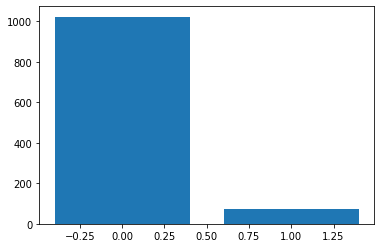

In [421]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1023 (65.284%)
Class=1, n=1023 (65.284%)


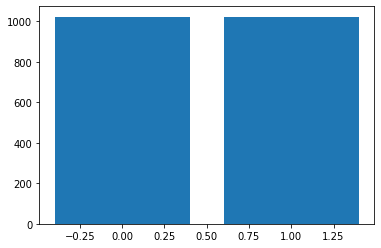

In [422]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [423]:

df=pd.DataFrame(y_train_over)
df.columns = ['Pass/Fail']
df=pd.concat([df,x_train_over], axis=1)
df

,Pass/Fail,v0,v10,v100,v101,v102,v107,v108,v112,v113,...,v86,v87,v89,v9,v90,v91,v93,v94,v98,v99
0,0,0.343366,0.391304,0.000000,2.000000,0.152395,-0.738525,-0.176039,-1.971880,0.109489,...,-0.544928,-2.306306,-0.391447,0.223958,-0.796196,-0.900000,-1.115385,1.500000,2.290676,-0.983221
1,0,0.906481,-0.408696,-0.250000,1.500000,1.847605,-0.174317,0.777506,0.475826,-0.021898,...,-0.790338,-0.054054,-0.082303,-0.744792,0.000000,-2.453763,0.769231,1.000000,1.736913,-0.562081
2,0,-0.337691,0.478261,-1.000000,0.000000,-0.211901,-0.230015,-0.991687,-0.277010,1.240876,...,0.000000,-1.684685,0.444079,0.562500,-0.239398,0.079570,0.615385,-0.500000,-0.095825,-0.624161
3,0,-1.402392,-0.573913,-0.750000,0.500000,0.573295,1.817432,0.347188,-0.320178,0.240876,...,0.713043,-1.882883,0.736842,0.072917,1.128807,0.195699,0.538462,0.000000,0.688262,-0.015101
4,0,0.654131,-0.608696,0.750000,0.000000,0.120464,-0.064982,-0.584841,0.293784,-0.795620,...,-0.885024,-1.684685,0.230263,-0.541667,2.220649,-0.379570,-0.846154,0.500000,-0.047789,0.140940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,1,-1.148796,0.666200,1.204716,-0.924318,1.202191,-0.004881,0.537734,0.054932,0.196392,...,-1.117004,-0.961883,-0.830816,0.092820,-0.138981,0.028171,0.650604,0.136477,-0.339070,0.289165
2042,1,-0.791030,-0.006903,-0.532856,-0.032856,-0.053147,-0.534067,-0.500639,-0.226445,0.173910,...,-0.091329,-1.471376,-1.074023,1.004256,-0.158756,0.185029,-0.256370,-0.532856,0.060782,0.168179
2043,1,0.002562,1.199064,0.832688,-0.388459,-0.426515,0.123632,0.356240,-2.084362,0.050571,...,-0.383246,-1.277898,0.316526,0.288221,-0.079457,-0.228030,0.895360,0.258972,0.174356,-0.762695
2044,1,-1.023454,0.803000,0.943892,-0.462595,1.293709,0.199862,0.336235,0.340241,-0.194629,...,-0.346513,0.286940,-1.048674,-0.512477,-0.324808,-0.293990,2.417322,0.308396,0.178187,0.243583


In [424]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1432, 226) (614, 226) (1432, 1) (614, 1)


In [426]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행
param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter' : [100,500,1000]
}

grid_search = GridSearchCV(log, param_grid, cv=5)

grid_search.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000]})

In [427]:
print('test accuracy : ', grid_search.score(test_x, test_y))
print('parameters : ', grid_search.best_params_)

test accuracy :  0.8615635179153095
parameters :  {'C': 1, 'max_iter': 1000}


In [428]:

print('학습용 데이터셋 정확도 : %.2f' % grid_search.score(train_x, train_y))
print('검증용 데이터셋 정확도 : %.2f' % grid_search.score(test_x, test_y))

학습용 데이터셋 정확도 : 0.89
검증용 데이터셋 정확도 : 0.86


In [429]:
from sklearn.metrics import classification_report
y_pred= grid_search.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       307
           1       0.86      0.86      0.86       307

    accuracy                           0.86       614
   macro avg       0.86      0.86      0.86       614
weighted avg       0.86      0.86      0.86       614



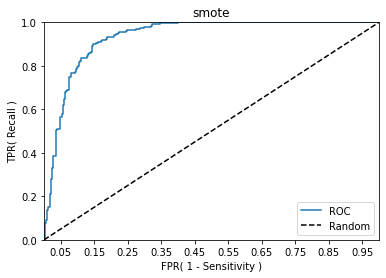

In [430]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, grid_search.predict_proba(test_x)[:, 1] )

## ADASYN
#### SMOTE의 개선된 버전이다. 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성된다. 즉 모든 표본이 약간 더 분산된다.

In [431]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train))

ada = ADASYN(random_state=12)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_res.shape, y_res.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_res).value_counts())

Original dataset shape Counter({0: 1023, 1: 73})
Resampled dataset shape Counter({0: 1023, 1: 1003})
오버샘플링 전 : (1096, 226) (1096,)

오버샘플링 후 : (2026, 226) (2026,)

오버샘플링 전 레이블 분포 :
 0    1023
1      73
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1023
1    1003
dtype: int64


In [432]:
df=pd.DataFrame(y_res)
df.columns = ['Pass/Fail']
df=pd.concat([df,X_res], axis=1)
df

,Pass/Fail,v0,v10,v100,v101,v102,v107,v108,v112,v113,...,v86,v87,v89,v9,v90,v91,v93,v94,v98,v99
0,0,0.343366,0.391304,0.000000,2.000000,0.152395,-0.738525,-0.176039,-1.971880,0.109489,...,-0.544928,-2.306306,-0.391447,0.223958,-0.796196,-0.900000,-1.115385,1.500000,2.290676,-0.983221
1,0,0.906481,-0.408696,-0.250000,1.500000,1.847605,-0.174317,0.777506,0.475826,-0.021898,...,-0.790338,-0.054054,-0.082303,-0.744792,0.000000,-2.453763,0.769231,1.000000,1.736913,-0.562081
2,0,-0.337691,0.478261,-1.000000,0.000000,-0.211901,-0.230015,-0.991687,-0.277010,1.240876,...,0.000000,-1.684685,0.444079,0.562500,-0.239398,0.079570,0.615385,-0.500000,-0.095825,-0.624161
3,0,-1.402392,-0.573913,-0.750000,0.500000,0.573295,1.817432,0.347188,-0.320178,0.240876,...,0.713043,-1.882883,0.736842,0.072917,1.128807,0.195699,0.538462,0.000000,0.688262,-0.015101
4,0,0.654131,-0.608696,0.750000,0.000000,0.120464,-0.064982,-0.584841,0.293784,-0.795620,...,-0.885024,-1.684685,0.230263,-0.541667,2.220649,-0.379570,-0.846154,0.500000,-0.047789,0.140940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,1,0.514569,0.720070,0.499751,-0.249751,-0.539798,0.206442,0.173039,-2.125745,-0.074677,...,-0.054235,-1.876088,0.329269,0.419164,-0.133439,-0.273748,0.307692,0.000000,-0.068034,-0.902114
2022,1,0.532647,-0.570883,1.136916,-0.886916,0.093669,0.483127,0.966303,-0.378647,-0.432792,...,0.275736,-1.973672,-0.492340,0.691287,0.030059,-0.039435,0.307692,0.000000,-0.739965,-0.215771
2023,1,0.530672,-0.518565,1.098762,-0.848762,-0.005067,0.508210,0.883154,0.084231,-0.171795,...,-0.227402,-1.334262,-0.458065,0.646635,0.207679,0.072078,-0.018052,0.000000,-0.743802,-0.377151
2024,1,0.526872,-0.312197,0.987863,-0.737863,-0.159907,0.490594,0.718948,0.196279,0.066192,...,-0.639281,-0.852701,-0.326008,0.578478,0.316644,0.123354,-0.256911,0.000000,-0.659170,-0.584807


In [433]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1418, 226) (608, 226) (1418, 1) (608, 1)


In [434]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행



In [435]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() #로지스틱 회귀분석 시행
param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter' : [100,500,1000]
}

grid_search = GridSearchCV(log, param_grid, cv=5)

grid_search.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000]})

In [436]:
print('test accuracy : ', grid_search.score(test_x, test_y))
print('parameters : ', grid_search.best_params_)

test accuracy :  0.8519736842105263
parameters :  {'C': 100, 'max_iter': 1000}


In [437]:

print('학습용 데이터셋 정확도 : %.2f' % grid_search.score(train_x, train_y))
print('검증용 데이터셋 정확도 : %.2f' % grid_search.score(test_x, test_y))

학습용 데이터셋 정확도 : 0.87
검증용 데이터셋 정확도 : 0.85


In [438]:
from sklearn.metrics import classification_report
y_pred=grid_search.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       307
           1       0.83      0.88      0.86       301

    accuracy                           0.85       608
   macro avg       0.85      0.85      0.85       608
weighted avg       0.85      0.85      0.85       608



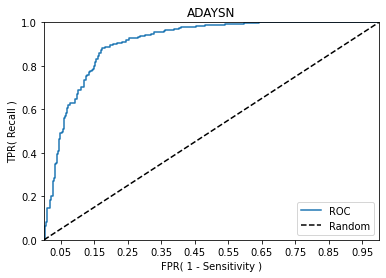

In [439]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('ADAYSN')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, grid_search.predict_proba(test_x)[:, 1] )